In [1]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

/home/ines/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [12]:
#gaussian noise/ SD = .5/ 50 samples
X1 = [-1, -1] + .5*np.random.randn(50, 2)
y1 = np.ones(50)

X2 = [-1, 1] + .5*np.random.randn(50, 2)
y2 = 2*np.ones(50)

X3 = [1, -1] + .5*np.random.randn(50, 2)
y3 = 3*np.ones(50)

X4 = [1, 1] + .5*np.random.randn(50, 2)
y4 = 4*np.ones(50)

In [13]:
#centered around one matrix
X = np.vstack([X1, X2, X3, X4])
y = np.hstack([y1, y2, y3, y4])

In [14]:
#tree with 2 branches
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

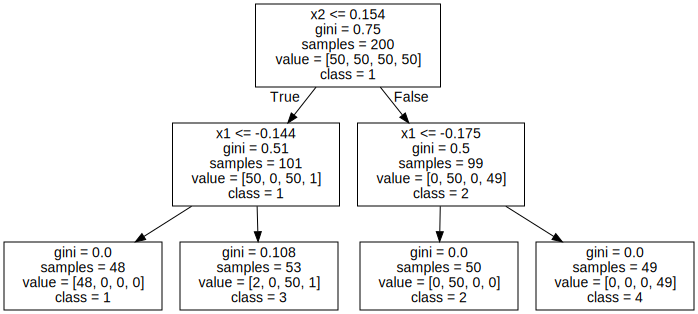

In [15]:
from sklearn import tree
import graphviz

data = tree.export_graphviz(tree_clf, feature_names = ["x1", "x2"], class_names=np.array(['1', '2', '3', '4']))
graphviz.Source(data)

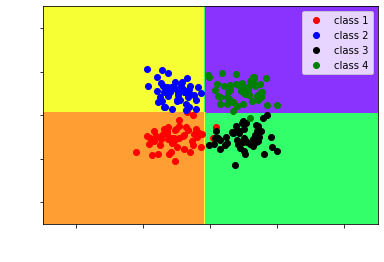

In [20]:
from matplotlib.colors import ListedColormap
def plotTreeBoundary(X, y, treeClf):
    x1_axis = np.linspace(-5, 5, 200)
    x2_axis = np.linspace(-5, 5, 200)
    x_grid_1, x_grid_2 = np.meshgrid(x1_axis, x2_axis)
    X_grid = np.c_[x_grid_1.ravel(), x_grid_2.ravel()]
    y_pred = treeClf.predict(X_grid).reshape(x_grid_1.shape)
    color_map = ListedColormap(['#FF9F33', '#F6FF33', "#33FF6B", "#8A33FF"])
    plt.contourf(x_grid_1, x_grid_2, y_pred, cmap=color_map)
    plt.plot(X1[:,0], X1[:, 1],'ro', label = 'class 1')
    plt.plot(X2[:,0], X2[:, 1],'bo', label = 'class 2')
    plt.plot(X3[:,0], X3[:, 1],'ko', label = 'class 3')
    plt.plot(X4[:,0], X4[:, 1],'go', label = 'class 4')
    plt.xlabel('x1', color = "w")
    plt.ylabel("x2", color = "w")
    plt.xticks(color = 'w')
    plt.yticks(color = 'w')
    plt.legend()

plt.figure
plotTreeBoundary(X, y, tree_clf)
plt.show()

x1 optimal at -0.114 as shown in decision tree

In [22]:
#tree clf capable of soft decision (prob of new arriving samples)
#hard decision uses predict, soft uses predict_proba

tree_clf.predict_proba([[3, -4]])

array([[0.03773585, 0.        , 0.94339623, 0.01886792]])

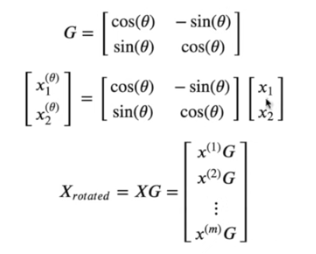

works best with orthogonal decision lines

givens matrix : rotate data by angle of theta about x axis

X is row vector, so applying the transpose reverse multiplication. sins rotated on the y axis

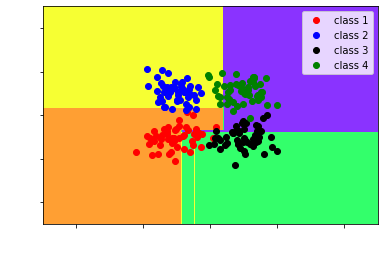

In [25]:
theta = 30*np.pi/180
G = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
X_rotated = X.dot(G)
rotated_tree_clf = DecisionTreeClassifier()
rotated_tree_clf.fit(X_rotated, y)

plt.figure()
plotTreeBoundary(X_rotated, y, rotated_tree_clf)
plt.show()

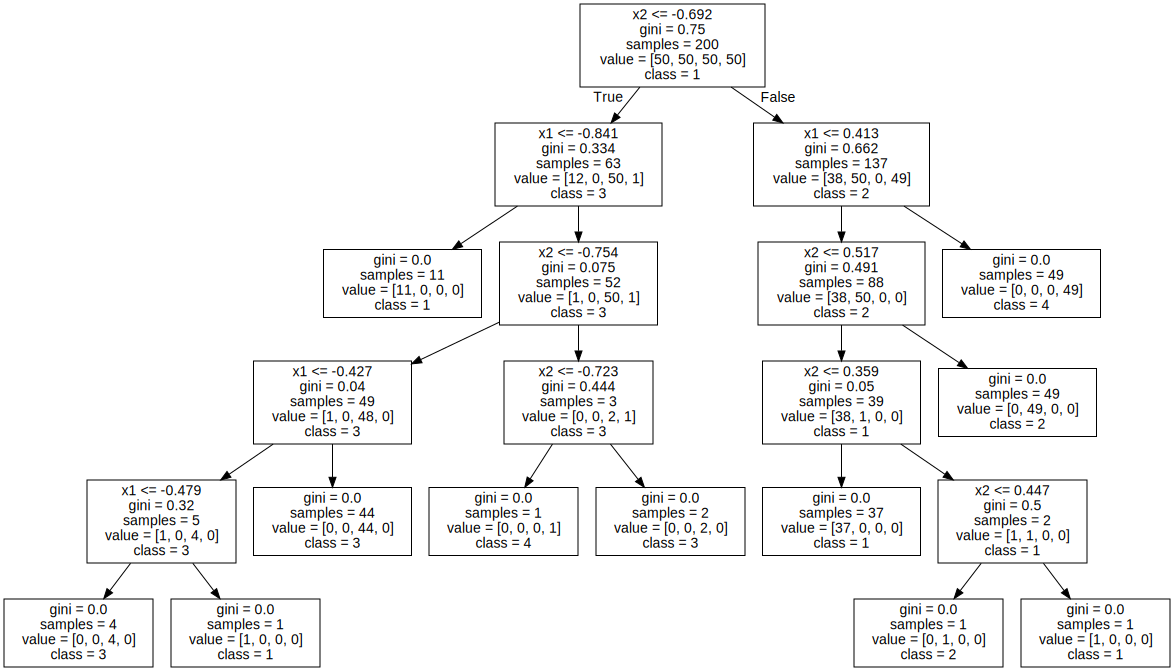

In [27]:
data2 = tree.export_graphviz(rotated_tree_clf, feature_names = ["x1", "x2"], class_names=np.array(['1', '2', '3', '4']))
graphviz.Source(data2)

# Regression

In [29]:
m = 400
X = 5*np.random.rand(m,1)
y = 3*(X-1)**3 #cube
y = y+5*np.random.rand(m, 1) #noise

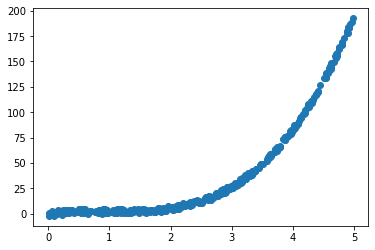

In [31]:
plt.plot(X, y, 'o')

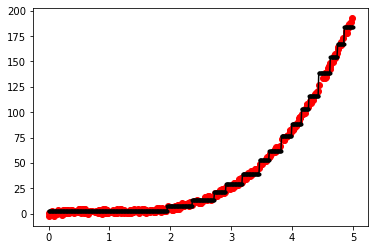

In [36]:
from sklearn.tree import DecisionTreeRegressor
treeReg = DecisionTreeRegressor(max_depth = 4)
treeReg.fit(X, y)
x1 = np.linspace(0, 5, 500).reshape(-1, 1)
y_pred = treeReg.predict(x1)
plt.plot(X, y, 'ro')
plt.plot(x1, y_pred, 'k.-')
plt.show()

max_depth = 2 -> 2^2, = 3 -> 3^2

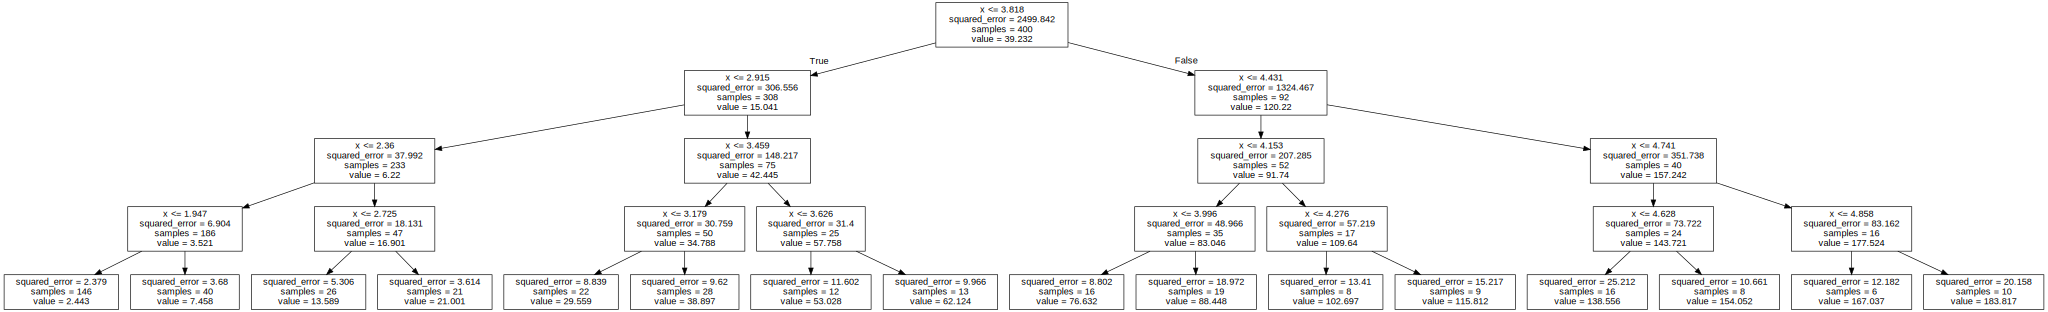

In [37]:
data3 = tree.export_graphviz(treeReg, feature_names = ["x"])
graphviz.Source(data3)

decision tree reg are simpler (discretize noisy data)

not a good solution for short term probelms (trading) <- doesn't show fluctuation

# Case study: stock clf

In [39]:
import pandas_datareader.data as web
import datetime
import pandas as pd

start = datetime.datetime(2010,1,1)
end = datetime.datetime.now()

In [42]:
df = web.DataReader('GOOGL', 'yahoo', start, end)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,15.753504,15.621622,15.689439,15.684434,78169752.0,15.684434
2010-01-05,15.711712,15.554054,15.695195,15.615365,120067812.0,15.615365
2010-01-06,15.662162,15.174174,15.662162,15.221722,158988852.0,15.221722
2010-01-07,15.265265,14.831081,15.250250,14.867367,256315428.0,14.867367
2010-01-08,15.096346,14.742492,14.814815,15.065566,188783028.0,15.065566
...,...,...,...,...,...,...
2022-07-25,109.870003,106.300003,108.410004,107.510002,34690900.0,107.510002
2022-07-26,107.199997,104.070000,106.599998,105.019997,47991000.0,105.019997
2022-07-27,113.910004,108.010002,109.260002,113.059998,59858500.0,113.059998


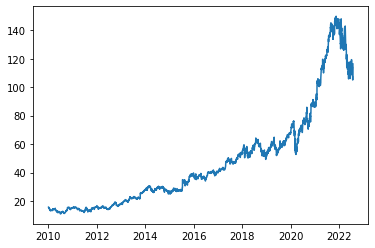

In [43]:
plt.plot(df["Close"])

In [67]:
#average 60d in future, compute relative returns, (-) or (+)
#pct: % change
df["Return"] = df["Adj Close"].pct_change(60).shift(-60)
features = ["High", 'Low', 'Open', 'Close', 'Volume', "Adj Close"]
X = df[features]
y = np.where(df.Return > 0, 1, 0) #where: if > 0 classify as 1, otherwise as 0

In [68]:
df

,High,Low,Open,Close,Volume,Adj Close,Return
Date,,,,,,,
2010-01-04,15.753504,15.621622,15.689439,15.684434,78169752.0,15.684434,-0.095142
2010-01-05,15.711712,15.554054,15.695195,15.615365,120067812.0,15.615365,-0.088447
2010-01-06,15.662162,15.174174,15.662162,15.221722,158988852.0,15.221722,-0.061240
2010-01-07,15.265265,14.831081,15.250250,14.867367,256315428.0,14.867367,-0.043562
2010-01-08,15.096346,14.742492,14.814815,15.065566,188783028.0,15.065566,-0.063918
...,...,...,...,...,...,...,...
2022-07-25,109.870003,106.300003,108.410004,107.510002,34690900.0,107.510002,NaN
2022-07-26,107.199997,104.070000,106.599998,105.019997,47991000.0,105.019997,NaN
2022-07-27,113.910004,108.010002,109.260002,113.059998,59858500.0,113.059998,NaN


In [69]:
from sklearn.model_selection import train_test_split

#stratify makes sure that if the parameter has n xs and m ys the sample will have n xs and m ys
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, stratify = y) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2215, 6)
(950, 6)
(2215,)
(950,)


In [70]:
treeClf = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 6)
treeClf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=6)

In [71]:
y_pred = treeClf.predict(X_test)

In [72]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.61      0.24      0.35       352
           1       0.67      0.91      0.77       598

    accuracy                           0.66       950
   macro avg       0.64      0.58      0.56       950
weighted avg       0.65      0.66      0.61       950



0: sell, 1: buy

precision drops when we dont average / we just forcast (change the 60d and % change to -1 and 1 respectively)

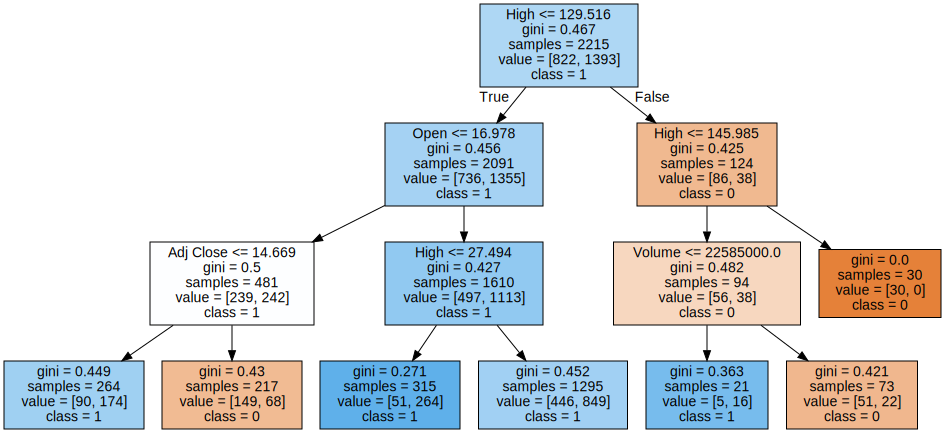

In [73]:
data4 = tree.export_graphviz(treeClf, filled = True, feature_names = features, class_names = np.array(['0', '1']))
graphviz.Source(data4)